# PROBLEMA 1
Suponga que se quiere hacer un estudio estadístico relacionado con alguna variable aleatoria de una población en particular. Para este fin, se han recopilado datos relacionados con dicha variable a través de diversos muestreos. Los datos recopilados se presentan en el archivo CSV adjunto (exam_data.csv), donde los datos en cada una de las columnas representa un conjunto muestral de n = 5000 elementos.

**Utilizando dicha información determinar lo siguiente:**
- a. Una estimación de la media y deviación estándar de la población de la cual fueron sustraídas las muestras.
- b. ¿Qué puede decir con respecto de la distribución de la media muestral?
- c. ¿Qué observaciones tiene respecto al proceso de muestreo?

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leer csv

In [2]:
df1 = pd.read_csv('data/exam_data.csv')
# elimina Unnamed: 0
df1 = df1.drop(columns=['Unnamed: 0'])
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,49.836306,45.101541,63.531488,69.009866,40.095654,84.906605,81.128278,86.037926,22.687573,89.401010,...,56.128399,93.800320,4.386771,16.349008,27.550263,42.603079,2.994481,79.478474,3.333662,45.342062
1,49.994347,45.773061,62.897416,68.556472,39.163533,85.087188,81.363247,85.743628,22.345356,88.697771,...,55.211598,93.662061,2.691202,15.798940,28.204315,42.388385,4.132100,79.523014,1.561063,46.735617
2,50.156428,45.000371,62.585317,69.176546,39.984561,85.171361,80.517995,85.979397,22.081638,89.397012,...,56.777065,94.845762,2.383015,16.875812,27.607749,41.460080,3.463460,78.510010,1.542030,47.052018
3,49.696662,45.493168,62.385483,68.946933,40.178232,84.701594,80.987396,85.579412,21.121060,88.496242,...,55.515248,94.502804,3.617272,15.814422,27.868727,42.747889,4.461889,78.852283,2.006766,47.503506
4,49.481798,44.913164,63.169940,69.125740,39.513078,84.637430,81.422197,85.073721,21.382952,88.695730,...,55.709846,93.913137,2.770727,16.534483,27.284645,43.859045,3.642493,78.656056,2.624068,47.067935
5,50.028949,45.251895,62.784015,69.964565,39.971670,85.595685,80.148644,86.341459,22.054040,89.440632,...,55.586543,94.874470,2.872235,16.163602,27.278864,43.138915,4.636375,78.840848,0.920369,47.818549
6,49.488570,44.342417,62.410067,68.973961,39.707925,85.201554,81.674802,87.206745,21.619606,88.618408,...,56.204980,94.238872,2.494874,15.682411,28.094896,42.780624,3.819681,79.674548,1.103494,46.438327
7,50.993590,44.115163,62.926313,68.687825,40.007977,85.239049,81.146014,86.339812,23.173693,89.511708,...,55.802359,93.324270,2.625556,15.351869,28.394650,43.360661,2.973661,78.561409,1.701424,46.741638
8,49.405534,44.462871,63.677012,69.391253,40.109682,86.039841,81.512589,86.119336,21.679343,88.711364,...,56.303586,94.059046,3.704879,15.408748,27.947071,43.513815,2.756307,79.571173,1.817062,47.400893
9,50.264496,45.557865,63.048611,69.854431,40.045069,85.406365,81.065284,85.939307,23.593950,88.344303,...,56.263645,93.150264,2.294697,15.924957,28.190021,43.064716,3.722637,79.242152,1.678051,46.268911


## Calcular media y desviación estándar poblacional

In [3]:
def get_n_bins(data):
    # Calcula el número óptimo de bins para un histograma usando la regla de Sturges.
    M = len(data)
    c = int(np.ceil(1+np.log2(M)))
    return c

In [125]:
# Calcular la media de cada columna para obtener 'S_dist'
Xmean_dist = df1.mean(axis=0)
Xsigma_dist = df1.std(axis=0)

# Calcular la media de la distribución 'S_dist'
Xmean_mu = np.mean(Xmean_dist)
# Calcular la desviación típica de la distribución 'S_dist'
Xmean_sigma = np.std(Xmean_dist)

n_bins = get_n_bins(Xmean_dist)

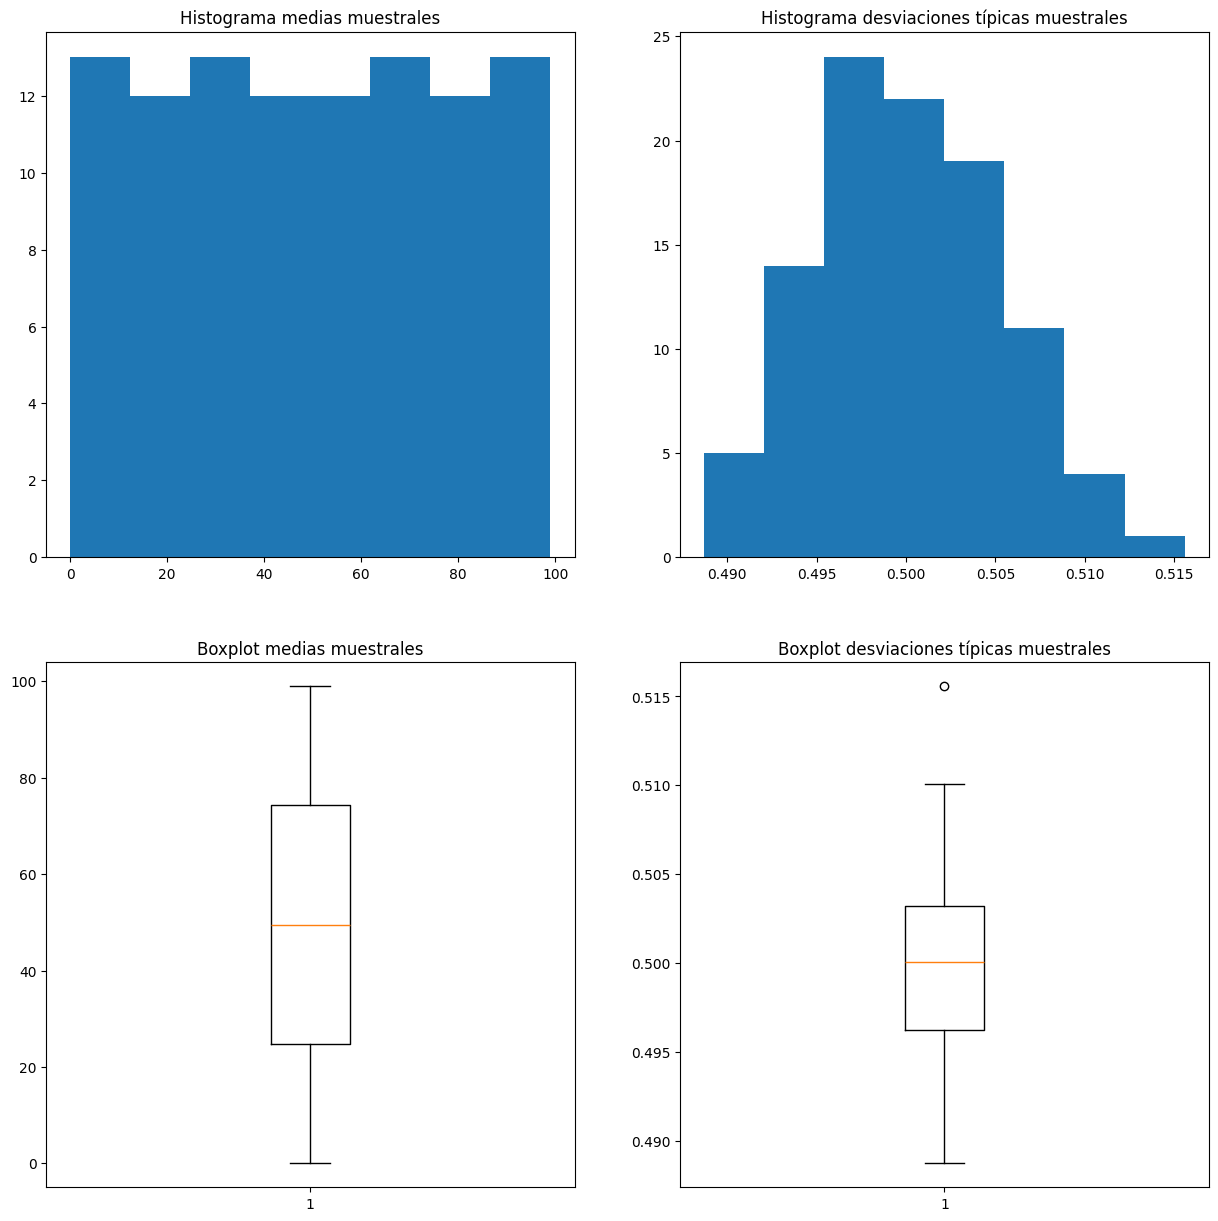

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0].hist(Xmean_dist,bins=n_bins)
ax[0][0].set_title('Histograma medias muestrales')

ax[0][1].hist(Xsigma_dist,bins=n_bins)
ax[0][1].set_title('Histograma desviaciones típicas muestrales')

ax[1][0].boxplot(Xmean_dist)
ax[1][0].set_title('Boxplot medias muestrales')

ax[1][1].boxplot(Xsigma_dist)
ax[1][1].set_title('Boxplot desviaciones típicas muestrales')

plt.show()

In [127]:
print("Xmean_mu = ", Xmean_mu)
print("Xmean_sigma = ", Xmean_sigma)
print("n_bins = ", n_bins)

print("Media de la poblacion = ", Xmean_mu)
print("Desviacion estandar de la poblacion = ", Xmean_sigma*np.sqrt(len(Xmean_dist)))


Xmean_mu =  49.49887914087672
Xmean_sigma =  28.86650595850412
n_bins =  8
Media de la poblacion =  49.49887914087672
Desviacion estandar de la poblacion =  288.6650595850412
